In [26]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
import os
import matplotlib.patches as patches

In [84]:
def getTemplate(file_path_txt, directory):
    with open(file_path_txt, 'r') as file:
        line = file.readline().strip()
    id,x,y,width,height,visible = list(map(int,line.split(',')))
    
    file_path_img = os.path.join(directory,"00001.jpg")
    
    full_image = cv2.imread(file_path_img)
    template = full_image[y:y+height, x:x+width]
    template = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)
    plt.imshow(template)
    plt.title('Template of the dasatet')
    plt.show()
    return template

In [18]:
def drawBox(img,bbox):
    x1,y1,width,height = bbox
    rect = patches.Rectangle((x1, y1), width, height, linewidth=1, edgecolor='green', facecolor='none')
    
    
    fig,ax = plt.subplots()
    ax.imshow(img)
    ax.add_patch(rect)
    plt.show()

In [56]:
def getOneObjectDetection(template, img):
    h,w = template.shape[::]
    res = cv2.matchTemplate(imgGray,template,cv2.TM_SQDIFF)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    plt.imshow(res, cmap='gray')
    return [min_loc[0],min_loc[1],w,h]


In [113]:
def objectDetection(dataset, maxFramesShow = 600, showEveryX = 10):
    filepathBB = os.path.join("datasets",dataset, "groundtruth_rect.txt")
    directory = os.path.join("datasets",dataset, "img")
    
    try:
        boundingBoxes = getBoundingBoxes(filepathBB)
    except:
        print("Haven't been found the groundtruth_rect.txt file")
    
    
    correct = []
    i = 1
    template = getTemplate(filepathBB, directory)
    h,w = template.shape[::]
    
    
    framesShow = min(maxFramesShow, len(os.listdir(directory))) 
    
    for filename in os.listdir(directory)[1:maxFramesShow]:
        filepath = os.path.join(directory, filename)
        img = cv2.imread(filepath)
        imgGray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

        res = cv2.matchTemplate(imgGray,template,cv2.TM_SQDIFF)
        min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
        bbox = [min_loc[0],min_loc[1],w,h]
        
        if showEveryX != 0 and i % showEveryX == 0 :
            drawBox(img,bbox)
        
        correct.append(getCorrectnes(bbox,boundingBoxes[i]))
        i+= 1
    return correct

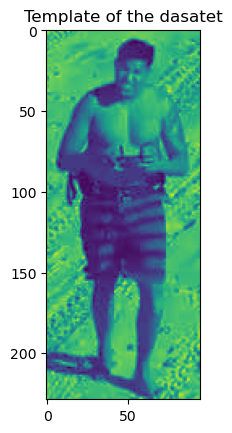

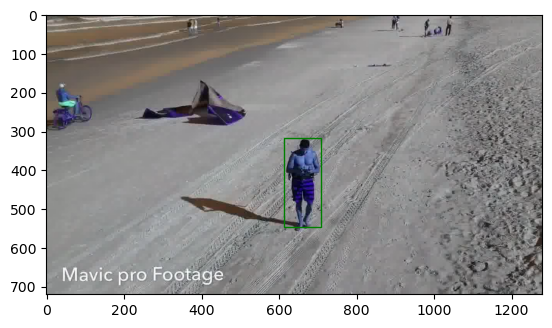

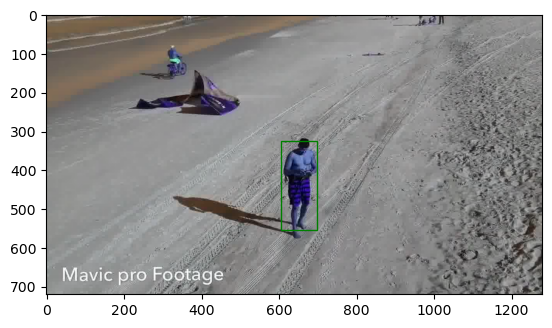

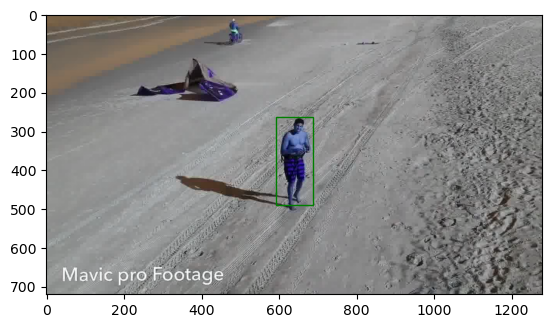

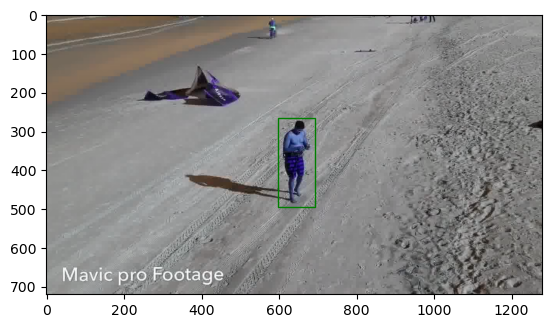

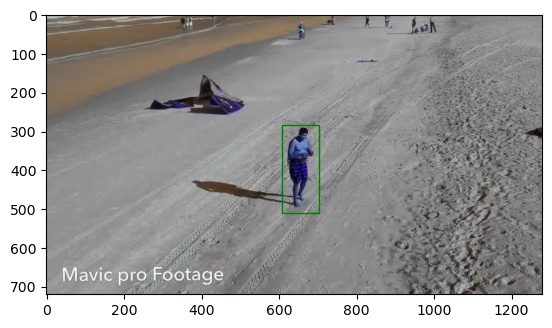

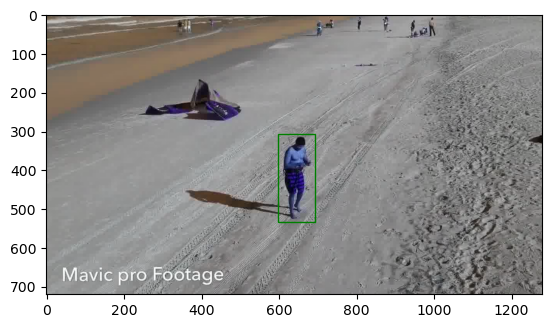

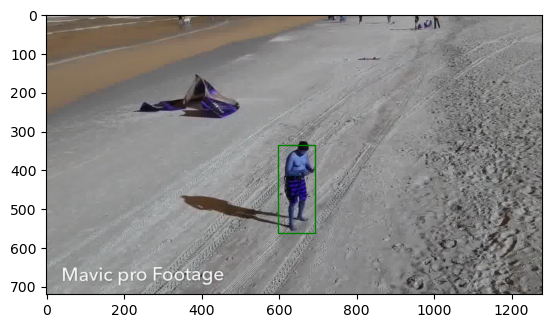

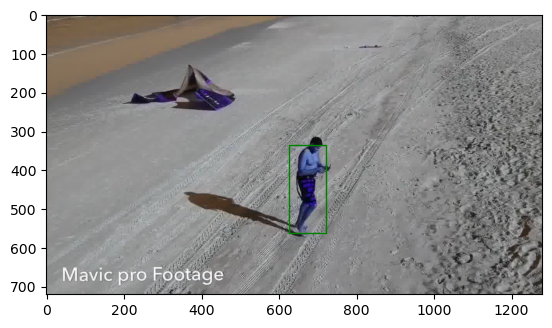

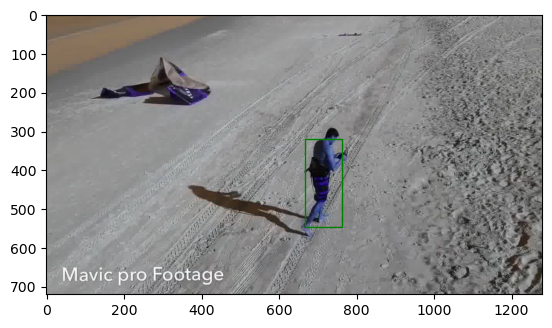

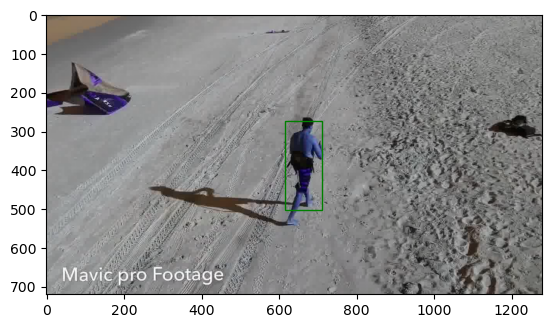

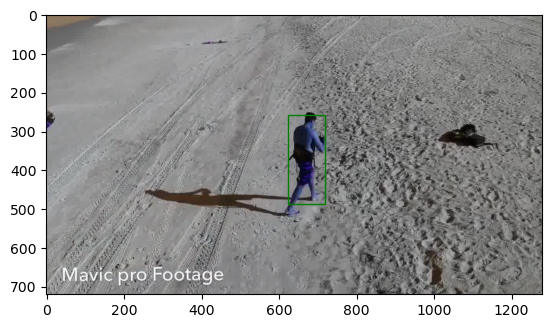

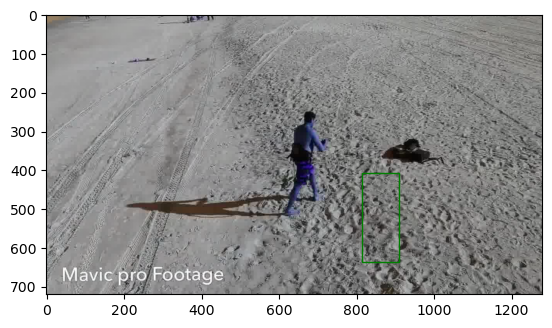

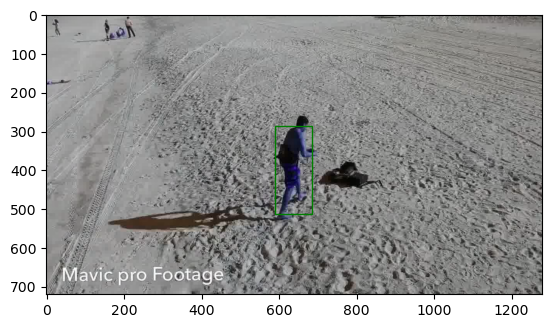

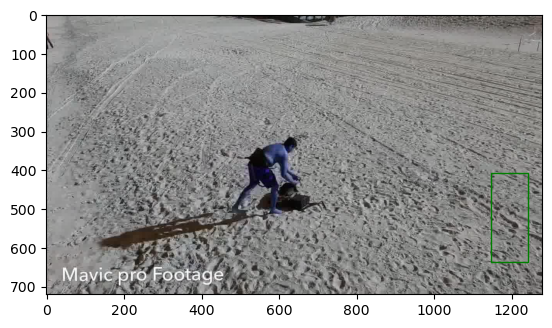

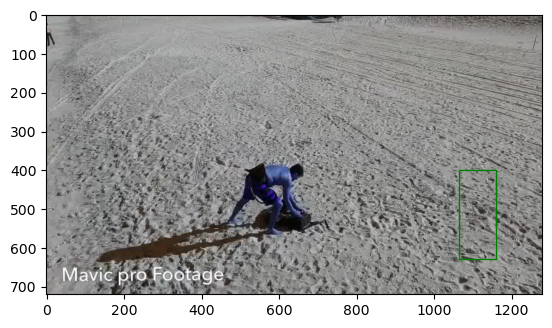

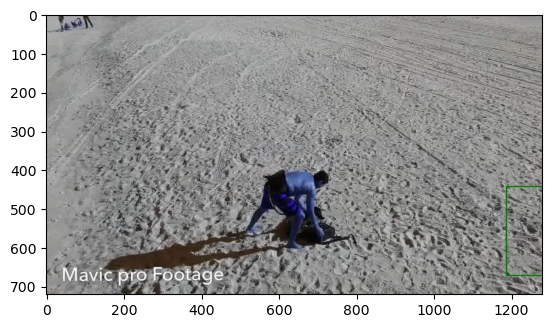

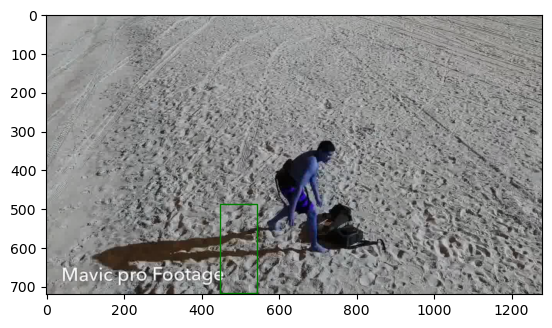

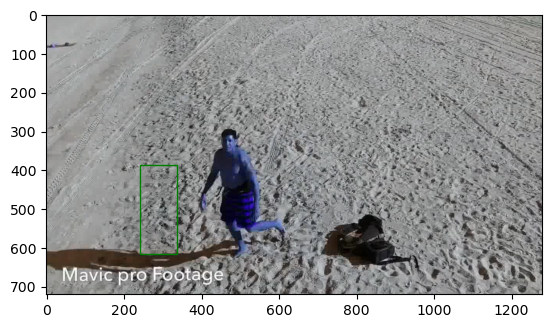

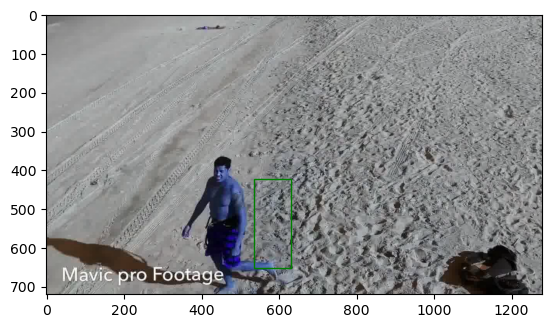

In [123]:
c =objectDetection(dataset="Drone1", showEveryX=30)

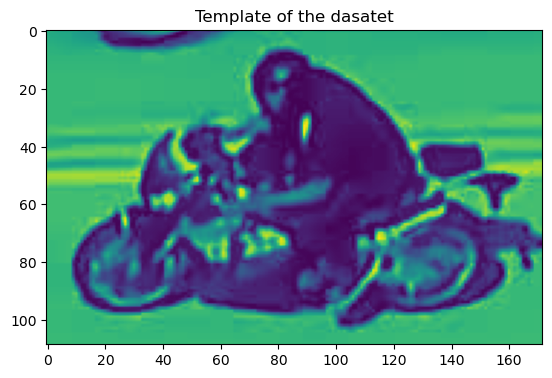

In [83]:
template = getTemplate('datasets/MotorcycleChase/')

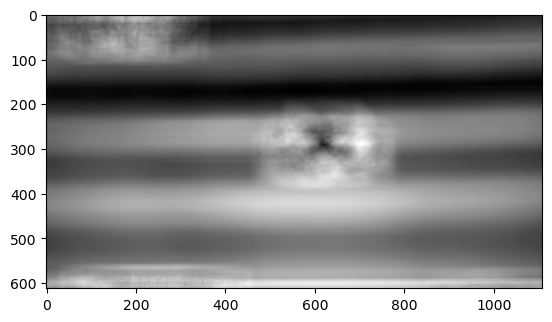

In [57]:
det = getObjectDetection(template, imgGray)

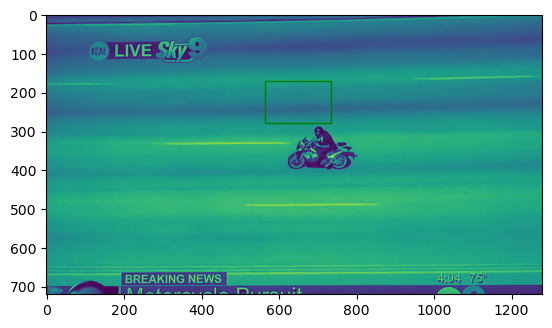

In [58]:
drawBox(imgGray,det)

In [124]:
sum(c)/len(c)

0.4435521559307623